In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
karate_net = nx.karate_club_graph()

In [ ]:
for i, edge in enumerate(karate_net.edges(data=True)):
    print(edge[2]['weight'])


In [18]:
pos = nx.spring_layout(karate_net)

In [33]:
weights = np.array([edge[2]['weight'] for edge in karate_net.edges(data=True)])

In [45]:
len()

34

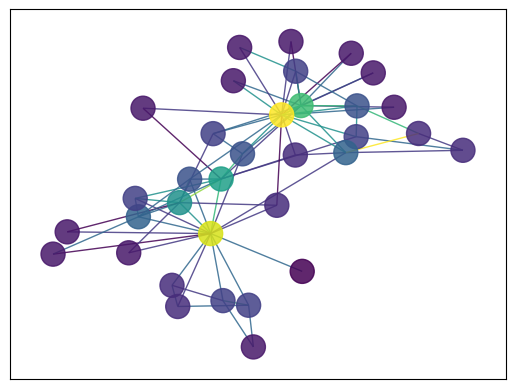

In [51]:
nx.draw_networkx(karate_net,
                 pos = pos,
                 cmap = 'viridis',
                 node_color =  list(dict(nx.degree(karate_net)).values()),
                 edge_color = weights,
                 alpha = 0.85,
                 with_labels = False)

In [66]:
G1 = nx.DiGraph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)

In [67]:
G1 = nx.DiGraph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)

G1.add_edge(1, 2)
G1.add_edge(1, 3)

G1.add_edge(2, 4)
G1.add_edge(5, 4)
G1.add_edge(3, 5)
G1.add_edge(2, 3)

G1[1][2]['capacity'] = 10
G1[1][3]['capacity'] = 5

G1[2][4]['capacity'] = 7
G1[2][3]['capacity'] = 6

G1[3][5]['capacity'] = 2

G1[5][4]['capacity'] = 2

In [75]:
G1[1][2]['capacity'] = 2
G1[1][3]['capacity'] = 5

G1[2][4]['capacity'] = 7
G1[2][3]['capacity'] = 6

G1[3][5]['capacity'] = 2

G1[5][4]['capacity'] = 2

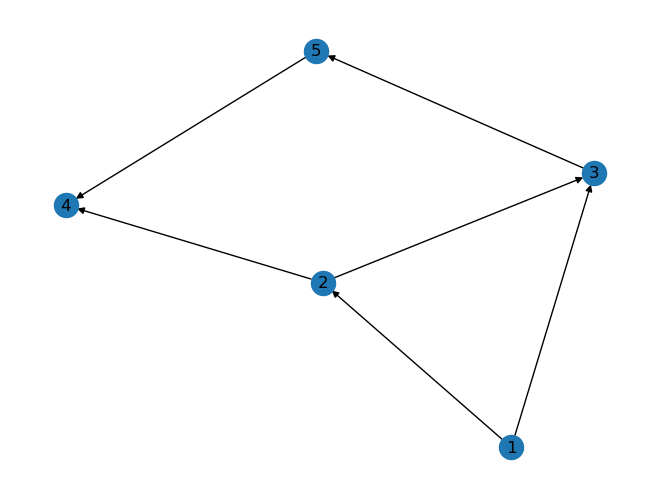

In [73]:
nx.draw(G1, with_labels = True)

In [76]:
nx.maximum_flow(G1, 1, 4, capacity = 'weight')

NetworkXUnbounded: Infinite capacity path, flow unbounded above.